# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

Es carrega el fitxer guardat en el preprocessament

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df1 = pd.read_csv(mainpath + "dfFinal.csv", sep = ",")
dates = pd.read_csv(mainpath + "dates.csv", sep = ";")
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  


In [5]:
sum(df1.duplicated())

0

## Llistes segons variable

In [3]:
objs = df1.describe(include = 'object').columns.tolist()
ints = df1.describe(include = 'int64').columns.tolist()
flts = df1.describe(include = 'float64').columns.tolist()

## Funcions

In [4]:
def habitacionsPerCategoria(categoria, df):
    cat = []
    habCat = []
    pHabCat = []
    for c in categoria.unique():
        cat.append(c) ## llista amb els valors unics de la categoria
        habCat.append(sum(df[categoria==c]['NHab'])) ## suma d'habitacions
        pHabCat.append(round(sum(df[categoria==c]['NHab'])*100/sum(df['NHab']),3)) ## percentatges
    return pd.DataFrame(list(zip(cat, habCat, pHabCat)), columns = ['id', 'Total habitacions', 'Percentatge %'])


def filtroMenorQue5(lista):
    if(lista < 5):
        return True
    else:
        return False
    
    
def llistaHotel(hotel, df):
    l = list(df[df['idhotel']==hotel]['NHab'])
    return l

# Anàlisi descriptiu

## Variable objectiu

In [6]:
df1.describe(include = 'float')

,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
25%,79.038319,79.085859,79.382370,79.654545,79.786046,79.935364,80.054545,80.083186,80.054545,80.054546,80.054545,80.054545,80.054546,80.136363,80.245454,80.245454,80.323636,80.318182,80.341309,80.318182,80.363636,80.318182,80.308693,80.323636,80.318181,80.323636,80.350732,80.363636,80.323636,80.323636,80.363636,80.363818,80.363636,80.363636,80.363636,80.504544,80.545455,80.708052,80.659380,80.727272,80.713636,80.727272,80.727272,80.727272,80.727272,80.774544,80.774544,80.749999,80.745455,80.727272,80.727272,80.727272,80.727272
50%,113.953165,114.074428,114.081818,114.140266,114.138181,114.149747,114.139342,114.318182,114.138181,114.039928,113.990909,113.890909,113.890908,113.897136,113.863637,113.906952,113.990909,114.001393,113.990909,113.890909,113.890909,113.963636,113.919647,113.818183,113.790251,113.646084,113.500000,113.272728,113.194351,113.243921,113.090910,113.015152,112.954545,112.954545,112.954545,112.954545,113.061818,112.996163,112.981494,112.954545,112.909092,112.848484,112.848484,112.781939,112.772728,112.727272,112.696364,112.653031,112.553692,112.537287,112.558464,112.595041,112.595041
75%,165.453409,165.369943,165.295967,165.306819,165.253038,165.147970,165.412273,165.442067,165.508177,165.594923,165.336737,165.293655,165.197727,165.127272,165.129761,165.101685,165.090910,165.090910,165.106591,165.351134,165.454545,165.236364,165.090910,165.090910,165.054544,164.900000,164.454546,164.459092,164.4590

In [6]:
df1['NHab'].describe()

count    47630.000000
mean         9.775667
std         18.072125
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        346.000000
Name: NHab, dtype: float64

Hi ha una gran diferència entre el percentil 75 i el màxim del nombre d'habitacions reservades. Han d'haver-hi pocs casos de reserves de moltes habitacions.

In [9]:
df100 = df1[df1['NHab']<100]
df50 = df1[df1['NHab']<50]
df20 = df1[df1['NHab']<20]
df10 = df1[df1['NHab']<10]

Es creen conjunts de dades reduint el valor màxim que pren *NHab*. Per tal de veure si les variables es comporten de diferent manera.

#### Histogrames

Text(0.5, 1.0, "Número d'habitacions ocupades")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

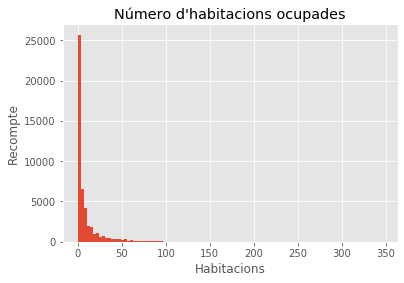

Text(0.5, 1.0, "Número d'habitacions ocupades (menys de 50)")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

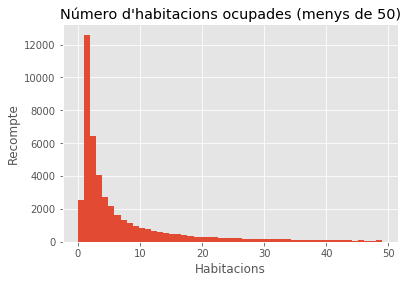

In [8]:
plt.title("Número d'habitacions ocupades")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['NHab'], bins = 100))

plt.title("Número d'habitacions ocupades (menys de 50)")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df50['NHab'], bins = 50))

#df1[df1['NHab']<40]['NHab']

Es veu clarament com la majoria de casos es concentren clarament en valors petits, en més de 35000 casos es reserva una sola habitació.

#### Distribució

Text(0.5, 1.0, "Distribució Número d'habitacions")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

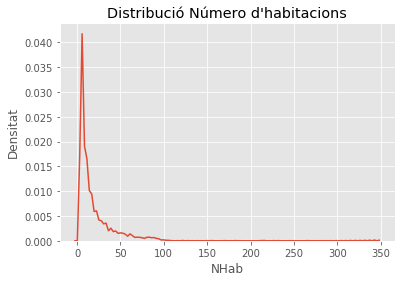

Text(0.5, 1.0, "Distribució Número d'habitacions (menys de 50)")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

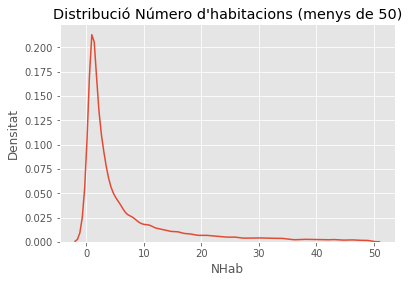

In [10]:
plt.title("Distribució Número d'habitacions")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df1.NHab, hist = False))

plt.title("Distribució Número d'habitacions (menys de 50)")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df50['NHab'], hist = False))


##### Distribució per trimestre, comparant 2018 i 2019

In [5]:
## Afegir variable trimestre
dates = dates.rename(columns = {'date':'fechaocupacion'})
dfTrim = pd.merge(df1, dates[['fechaocupacion', 'añoTrim']])
#dfTrim.trimestre = dfTrim.trimestre.asobject

In [12]:
dfTrim.añoTrim.describe()

count      47630
unique         7
top       2018_3
freq       13863
Name: añoTrim, dtype: object

Text(0.5, 1.0, '2018 vs 2019 1r trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

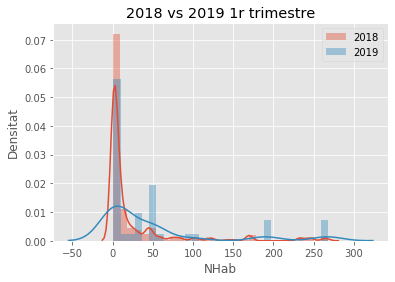

Text(0.5, 1.0, '2018 vs 2019 2n trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

<function matplotlib.pyplot.show(*args, **kw)>

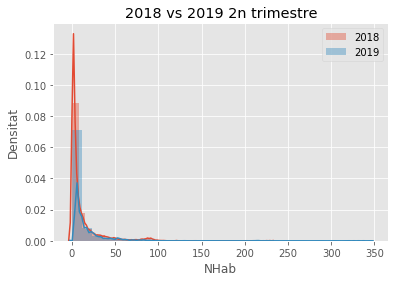

In [6]:
plt.title("2018 vs 2019 1r trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_1']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_1']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show()

plt.title("2018 vs 2019 2n trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_2']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_2']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show





Text(0.5, 1.0, '2018 vs 2019 3r trimestre')

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

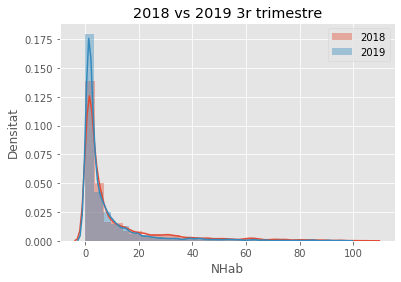

In [7]:
plt.title("2018 vs 2019 3r trimestre")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
sns.distplot(dfTrim[dfTrim['añoTrim']=='2018_3']['NHab'], label = '2018', bins = 30)
sns.distplot(dfTrim[dfTrim['añoTrim']=='2019_3']['NHab'], label = '2019', bins = 30)
plt.legend()
plt.show()

S’observen petites diferencies en els dos primers trimestres, sembla que per a l’any 2018, la variable NHab pren valors més petits. Però es comporten de manera similar en tots dos anys, havent-hi majoria de valors petits. En el 3r trimestre, per al 2019 només s'agafen les dades de juliol.

#### Boxplots

Text(0.5, 1.0, "Boxplot Número d'habitacions")

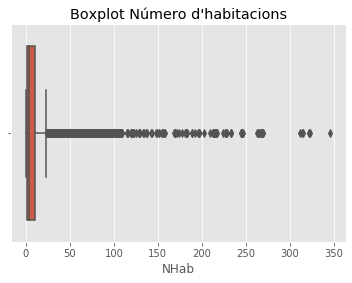

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 100)")

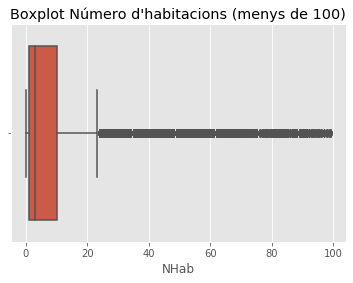

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 50)")

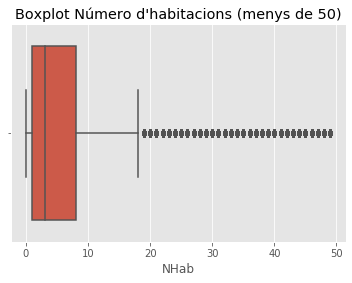

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 20)")

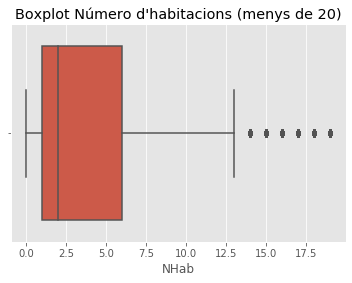

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 10)")

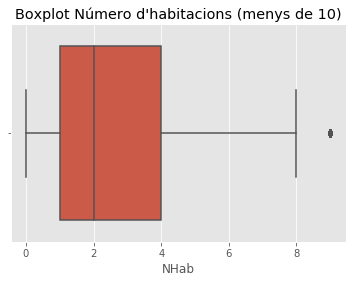

In [10]:
plt.title("Boxplot Número d'habitacions")
plt.show(sns.boxplot(x = df1['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 100)")
plt.show(sns.boxplot(x = df100['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 50)")
plt.show(sns.boxplot(x = df50['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 20)")
plt.show(sns.boxplot(x = df20['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 10)")
plt.show(sns.boxplot(x = df10['NHab']))

In [18]:
df100['NHab'].describe()
df50['NHab'].describe()
df20['NHab'].describe()
df10['NHab'].describe()

count    47484.000000
mean         9.289045
std         15.425153
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max         99.000000
Name: NHab, dtype: float64

count    45590.000000
mean         6.834986
std          9.436435
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         49.000000
Name: NHab, dtype: float64

count    40989.000000
mean         4.139330
std          4.390346
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         19.000000
Name: NHab, dtype: float64

count    35604.000000
mean         2.699978
std          2.287862
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          9.000000
Name: NHab, dtype: float64

#### Percentatges

In [16]:
pNhab = []
## Càlcul percentatge representatiu de la mostra segons NHab
for i in range(max(df1['NHab'])):
    pNhab.append(round((df1[df1['NHab']>=i].shape[0]/df1.shape[0])*100, 2))

In [17]:
pNhabInv = []
for i in range(max(df1['NHab'])):
    pNhabInv.append(round((df1[df1['NHab']<=i].shape[0]/df1.shape[0])*100, 2))

Text(0.5, 1.0, "Percentil segons l'augment del nombre d'habitacions")

Text(0.5, 0, "Nombre d'habitacions ocupades")

Text(0, 0.5, 'Percentil')

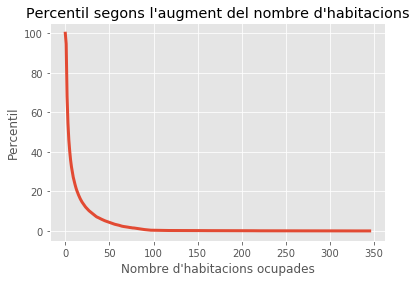

In [18]:

plt.title("Percentil segons l'augment del nombre d'habitacions")
plt.xlabel("Nombre d'habitacions ocupades")
plt.ylabel("Percentil")
plt.plot(range(max(df1['NHab'])), pNhab, linewidth = 3)

In [19]:
menor5 = filter(filtroMenorQue5, pNhab)
pNhab5 = []

for i in menor5:
    pNhab5.append(i)

Text(0.5, 1.0, "Percentil segons l'augment del nombre d'habitacions")

Text(0.5, 0, "Nombre d'habitacions ocupades")

Text(0, 0.5, 'Percentil')

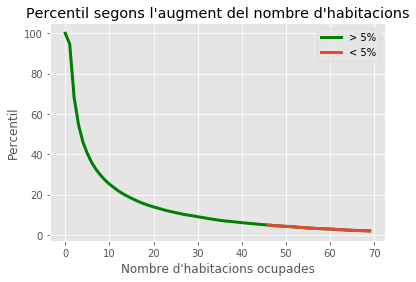

In [20]:
plt.title("Percentil segons l'augment del nombre d'habitacions")
plt.xlabel("Nombre d'habitacions ocupades")
plt.ylabel("Percentil")
plt.plot(range(70), pNhab[0:70], c = 'g', linewidth = 3, label = '> 5%')
plt.plot(range(len(pNhab) - len(pNhab5), 70), pNhab5[0:(70-(len(pNhab) - len(pNhab5)))], linewidth = 3, label = '< 5%')
##                   
plt.legend()


En color vermell, es mostren els valors per els quals el percentatge de la mostra és inferior al 5%.

In [21]:
print("Concretament, a partir de", len(pNhab) - len(pNhab5), "habitacions ocupades cap amunt, les dades representen menys d'un 5% sobre el total.")

Concretament, a partir de 46 habitacions ocupades cap amunt, les dades representen menys d'un 5% sobre el total.


## Variables categòriques

### Hotel

#### Anàlisi univariat

In [22]:
df1.idhotel.describe()

count               47630
unique                  7
top       TAURUS_AQUAPARK
freq                12348
Name: idhotel, dtype: object

In [23]:
df1.idhotel.unique()

array(['MAR_MENUDA', 'BAHIA_TOSSA', 'PORT_SALOU', 'AV_SUITES',
       'DONAIRE_BEACH', 'TAURUS_AQUAPARK', 'COSTA_SALOU'], dtype=object)

Text(0.5, 1.0, 'ID hotel')

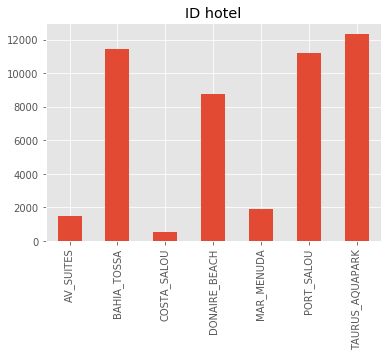

Text(0.5, 1.0, 'ID hotel')

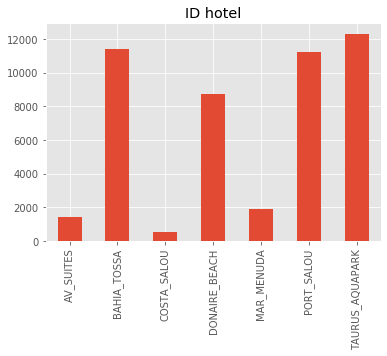

Text(0.5, 1.0, 'ID hotel')

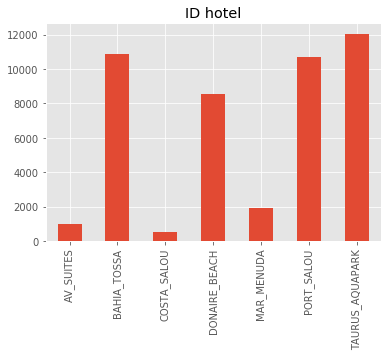

Text(0.5, 1.0, 'ID hotel')

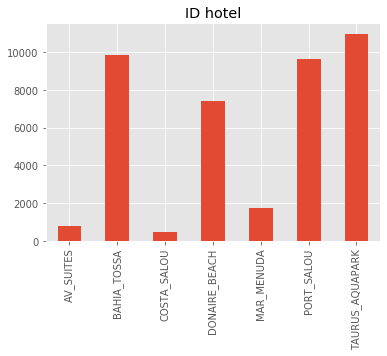

Text(0.5, 1.0, 'ID hotel')

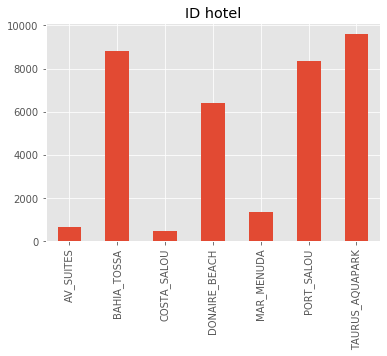

In [24]:
plt.title('ID hotel')
plt.show(df1['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df100['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df50['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df20['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df10['idhotel'].value_counts().sort_index().plot.bar())

In [25]:
h = pd.concat([df1['idhotel'].value_counts().sort_index()/len(df1)*100, 
                df1['idhotel'].value_counts().sort_index()], axis = 1)
h.columns = ['%', 'Recompte']
h.sort_values(by=['Recompte'], ascending = False)

h100 = pd.concat([df100['idhotel'].value_counts().sort_index()/len(df100)*100, 
                df100['idhotel'].value_counts().sort_index()], axis = 1)
h100.columns = ['%', 'Recompte']
h100.sort_values(by=['Recompte'], ascending = False)

h50 = pd.concat([df50['idhotel'].value_counts().sort_index()/len(df50)*100, 
                df50['idhotel'].value_counts().sort_index()], axis = 1)
h50.columns = ['%', 'Recompte']
h50.sort_values(by=['Recompte'], ascending = False)

h20 = pd.concat([df20['idhotel'].value_counts().sort_index()/len(df20)*100, 
                df20['idhotel'].value_counts().sort_index()], axis = 1)
h20.columns = ['%', 'Recompte']
h20.sort_values(by=['Recompte'], ascending = False)

h10 = pd.concat([df10['idhotel'].value_counts().sort_index()/len(df10)*100, 
                df10['idhotel'].value_counts().sort_index()], axis = 1)
h10.columns = ['%', 'Recompte']
h10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
TAURUS_AQUAPARK,25.924837,12348
BAHIA_TOSSA,24.049969,11455
PORT_SALOU,23.552383,11218
DONAIRE_BEACH,18.360277,8745
MAR_MENUDA,3.972286,1892
AV_SUITES,3.079992,1467
COSTA_SALOU,1.060256,505


,%,Recompte
TAURUS_AQUAPARK,25.930840,12313
BAHIA_TOSSA,23.978603,11386
PORT_SALOU,23.603740,11208
DONAIRE_BEACH,18.410412,8742
MAR_MENUDA,3.984500,1892
AV_SUITES,3.028389,1438
COSTA_SALOU,1.063516,505


,%,Recompte
TAURUS_AQUAPARK,26.440009,12054
BAHIA_TOSSA,23.915332,10903
PORT_SALOU,23.481027,10705
DONAIRE_BEACH,18.797982,8570
MAR_MENUDA,4.150033,1892
AV_SUITES,2.107918,961
COSTA_SALOU,1.107699,505


,%,Recompte
TAURUS_AQUAPARK,26.790114,10981
BAHIA_TOSSA,24.045476,9856
PORT_SALOU,23.528264,9644
DONAIRE_BEACH,18.160970,7444
MAR_MENUDA,4.315792,1769
AV_SUITES,1.959062,803
COSTA_SALOU,1.200322,492


,%,Recompte
TAURUS_AQUAPARK,26.988541,9609
BAHIA_TOSSA,24.778115,8822
PORT_SALOU,23.424334,8340
DONAIRE_BEACH,17.927761,6383
MAR_MENUDA,3.833839,1365
AV_SUITES,1.755421,625
COSTA_SALOU,1.291990,460


L'hotel que apareix en més casos és el TAURUS_AQUAPARK, hi ha una gran diferencia entre els 3 que menys apareixen i la resta


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

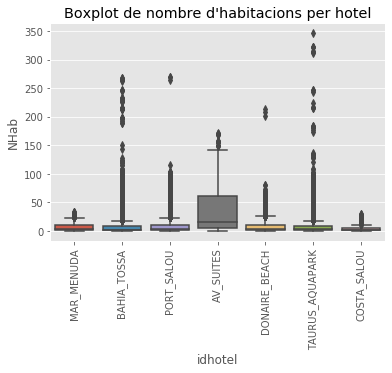

In [26]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

L'hotel AVENIDA_SUITES es comporta molt diferent a la resta, mentre que el percentil 75 en la resta d'hotels són aproximadament entre 4 i 10 habitacions, en aquest cas es troba al voltant de 60.

El MAR_MENUDA i el COSTA_SALOU gairebé no tenen casos per sobre de 50. La resta d'hotels es comporten d'una manera similar amb la variable resposta. Tenen molts casos força superiors al percentil 75. 

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

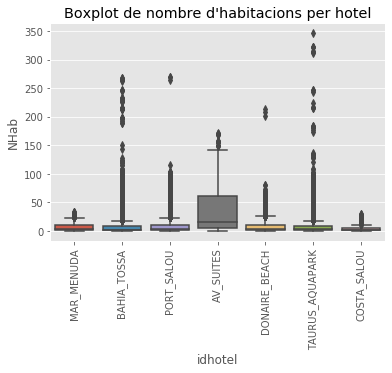

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 100)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

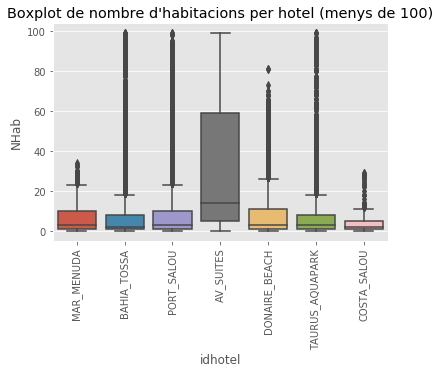

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 50)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

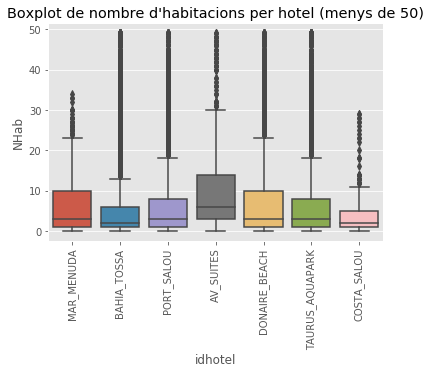

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 20)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

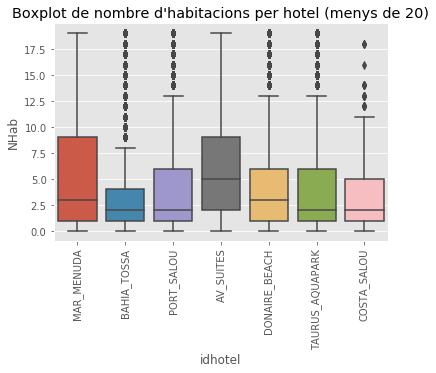

In [30]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 100)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df100))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 50)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df50))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 20)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df20))




Total d'habitacions venudes per hotel.

In [27]:
habitacionsPerCategoria(df1['idhotel'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
1,BAHIA_TOSSA,113489,24.374
2,PORT_SALOU,107041,22.989
5,TAURUS_AQUAPARK,103879,22.310
4,DONAIRE_BEACH,79029,16.973
3,AV_SUITES,48197,10.351
0,MAR_MENUDA,11960,2.569
6,COSTA_SALOU,2020,0.434


Tot i que l'AVENIDA_SUITES és l'hotel que menys apareix en el dataset, no es el que menys ven, el total d'habitacions venudes per aquest hotel representa al voltant d'un 10% de les habitacions venudes.

El MAR_MENUDA i el COSTA_SALOU són els que menys habitacions vénen amb diferència, mentre que el BAHIA_TOSSA, el PORT_SALOU i el TAURUS_AQUAPARK vénen un percentatge força similar.

### Client

#### Anàlisi univariat

In [32]:
df1.idcliente.describe()

count     47630
unique        4
top       Otros
freq      21050
Name: idcliente, dtype: object

Text(0.5, 1.0, 'ID client')

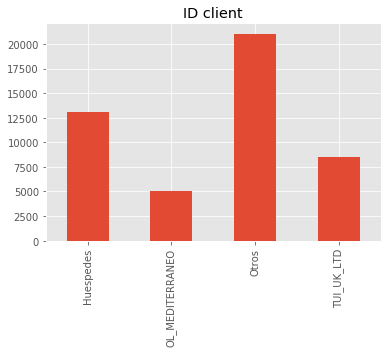

Text(0.5, 1.0, 'ID client')

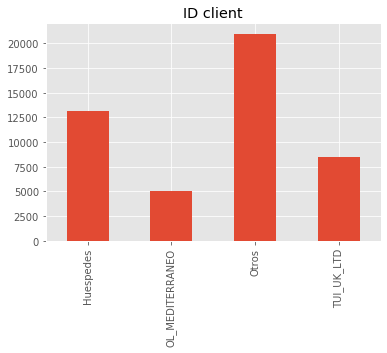

Text(0.5, 1.0, 'ID client')

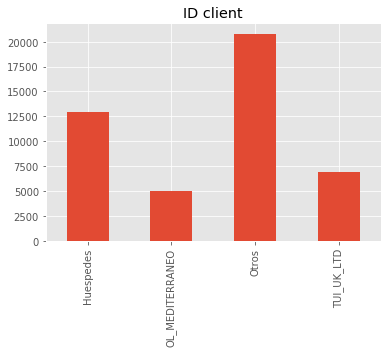

Text(0.5, 1.0, 'ID client')

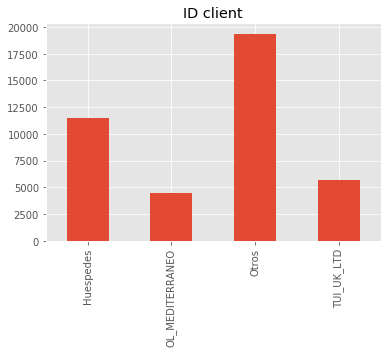

Text(0.5, 1.0, 'ID client')

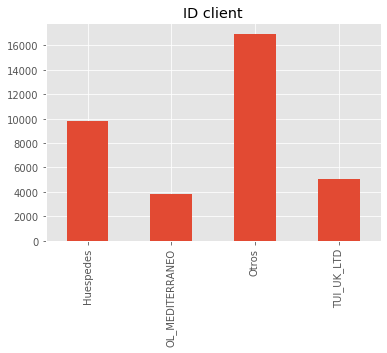

In [28]:
plt.title('ID client')
plt.show(df1['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df100['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df50['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df20['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df10['idcliente'].value_counts().sort_index().plot.bar())

In [29]:
cl = pd.concat([df1['idcliente'].value_counts().sort_index()/len(df1)*100, 
                df1['idcliente'].value_counts().sort_index()], axis = 1)
cl.columns = ['%', 'Recompte']
cl.sort_values(by=['Recompte'], ascending = False)

cl100 = pd.concat([df100['idcliente'].value_counts().sort_index()/len(df100)*100, 
                df100['idcliente'].value_counts().sort_index()], axis = 1)
cl100.columns = ['%', 'Recompte']
cl100.sort_values(by=['Recompte'], ascending = False)

cl50 = pd.concat([df50['idcliente'].value_counts().sort_index()/len(df50)*100, 
                df50['idcliente'].value_counts().sort_index()], axis = 1)
cl50.columns = ['%', 'Recompte']
cl50.sort_values(by=['Recompte'], ascending = False)

cl20 = pd.concat([df20['idcliente'].value_counts().sort_index()/len(df20)*100, 
                df20['idcliente'].value_counts().sort_index()], axis = 1)
cl20.columns = ['%', 'Recompte']
cl20.sort_values(by=['Recompte'], ascending = False)

cl10 = pd.concat([df10['idcliente'].value_counts().sort_index()/len(df10)*100, 
                df10['idcliente'].value_counts().sort_index()], axis = 1)
cl10.columns = ['%', 'Recompte']
cl10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
Otros,44.194835,21050
Huespedes,27.516271,13106
TUI_UK_LTD,17.778711,8468
OL_MEDITERRANEO,10.510183,5006


,%,Recompte
Otros,44.164350,20971
Huespedes,27.562969,13088
TUI_UK_LTD,17.780726,8443
OL_MEDITERRANEO,10.491955,4982


,%,Recompte
Otros,45.641588,20808
Huespedes,28.293485,12899
TUI_UK_LTD,15.224830,6941
OL_MEDITERRANEO,10.840097,4942


,%,Recompte
Otros,47.278538,19379
Huespedes,28.017273,11484
TUI_UK_LTD,13.779307,5648
OL_MEDITERRANEO,10.924882,4478


,%,Recompte
Otros,47.651949,16966
Huespedes,27.527806,9801
TUI_UK_LTD,14.152904,5039
OL_MEDITERRANEO,10.667341,3798


Les reserves fetes des de les agències TUI UK LTD i OLIMPIA MEDITERRANEO suposen gairebé un 20% de les dades, mentre que les fetes directament pels hostes suposen un altre 20%. La majoria de casos són reserves fetes a partir d'altres agències clients.

#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

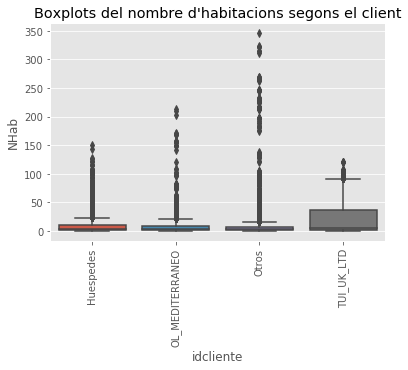

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 100)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

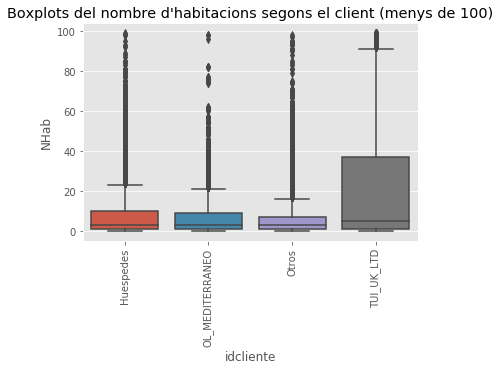

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 50)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

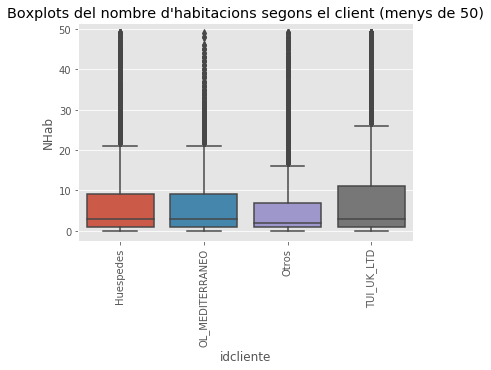

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 20)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

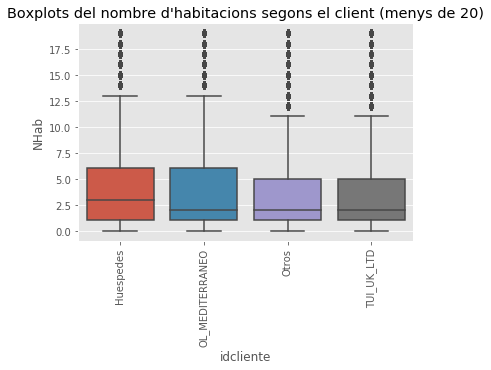

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 10)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

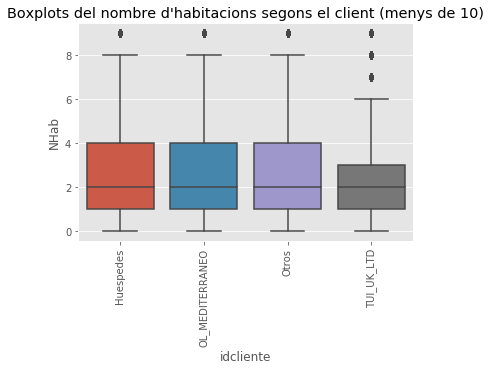

In [30]:
plt.title("Boxplots del nombre d'habitacions segons el client")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df1))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 100)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df100))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 50)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df50))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 20)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df20))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 10)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df10))


Destaca el comportament de l'agència TUI UK LTD amb la variable resposta. El percentil 75 arriba fins al voltant de les 40 habitacions, no obstant, el cas màxim d'habitacions reservades des d'aquesta empresa no arriba a les 150 habitacions.

##### Comportament idhotel amb idcliente

In [38]:
hotelcl = pd.crosstab(df1.idhotel, df1.idcliente, margins = True, margins_name = 'Total')
hotelcl

idcliente,Huespedes,OL_MEDITERRANEO,Otros,TUI_UK_LTD,Total
idhotel,,,,,
AV_SUITES,58,46,560,803,1467
BAHIA_TOSSA,3373,1023,4770,2289,11455
COSTA_SALOU,123,54,275,53,505
DONAIRE_BEACH,1994,1080,3901,1770,8745
MAR_MENUDA,731,131,798,232,1892
PORT_SALOU,3629,1584,4804,1201,11218
TAURUS_AQUAPARK,3198,1088,5942,2120,12348
Total,13106,5006,21050,8468,47630


La majoria d'habitacions de l'hotel AVENIDA_SUITES les reserven mitjançant l'agència TUI UK LTD, això quadra amb el que s'ha vist, ja que tant l'hotel com l'agència en qüestió acostumen a vendre habitacions en 'packs'.

### Tipus Habitació


#### Anàlisi univariat

In [7]:
df1.idtipohab.describe()
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)

count     47630
unique        6
top         DBL
freq      28447
Name: idtipohab, dtype: object

,%,Recompte
DBL,59.724963,28447
FAM,23.142977,11023
SUI,7.774512,3703
PREM,5.775772,2751
IND,3.579677,1705
APART,0.002100,1


S'ha de decidir que fer amb el cas que correspon al tipus APART, ja que al només haver-hi un és susceptible de ser eliminat o ajuntat amb altres tipus d'habitació.
Es mira en detall quin cas és i es decideix si s'elimina o s'ajunta amb un altre tipus d'habitació.

In [8]:
df1[df1.idtipohab=='APART']

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
25858,AV_SUITES,2019-04-27,Huespedes,APART,MP,DESCONOCIDO,DESCONOCIDO,ES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,118


En l'anàlisi bivariat entre el tipus d'habitació i l'hotel es podrà veure com l'hotel 'AVENIDA_SUITES', que és l'hotel que ha venut aquesta habitació, només venen suites, per tant, es transformarà en suite. 

In [12]:
df1.idtipohab = df1.idtipohab.replace('APART', 'SUI')


Text(0.5, 1.0, "Tipus d'habitació")

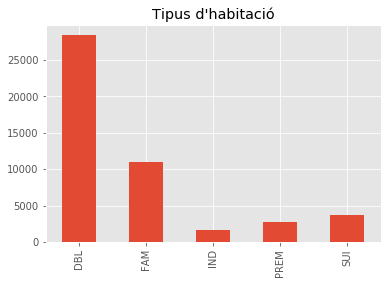

Text(0.5, 1.0, "Tipus d'habitació")

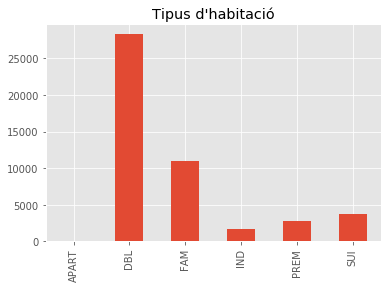

Text(0.5, 1.0, "Tipus d'habitació")

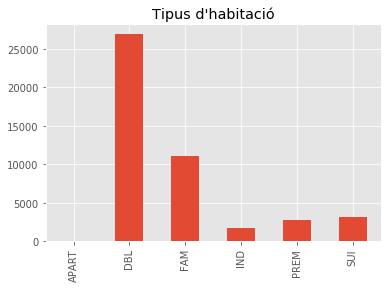

Text(0.5, 1.0, "Tipus d'habitació")

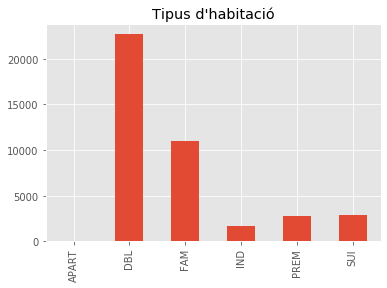

Text(0.5, 1.0, "Tipus d'habitació")

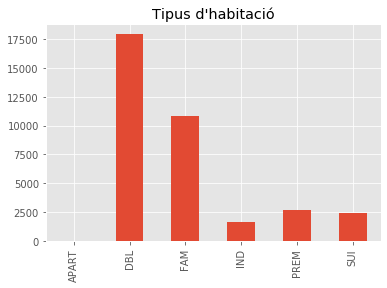

In [13]:
plt.title("Tipus d'habitació")
plt.show(df1['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df100['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df50['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df20['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df10['idtipohab'].value_counts().sort_index().plot.bar())






In [14]:
hab = pd.concat([df1['idtipohab'].value_counts().sort_index()/len(df1)*100, 
                df1['idtipohab'].value_counts().sort_index()], axis = 1)
hab.columns = ['%', 'Recompte']
hab.sort_values(by=['Recompte'], ascending = False)

hab100 = pd.concat([df100['idtipohab'].value_counts().sort_index()/len(df100)*100, 
                df100['idtipohab'].value_counts().sort_index()], axis = 1)
hab100.columns = ['%', 'Recompte']
hab100.sort_values(by=['Recompte'], ascending = False)

hab50 = pd.concat([df50['idtipohab'].value_counts().sort_index()/len(df50)*100, 
                df50['idtipohab'].value_counts().sort_index()], axis = 1)
hab50.columns = ['%', 'Recompte']
hab50.sort_values(by=['Recompte'], ascending = False)

hab20 = pd.concat([df20['idtipohab'].value_counts().sort_index()/len(df20)*100, 
                df20['idtipohab'].value_counts().sort_index()], axis = 1)
hab20.columns = ['%', 'Recompte']
hab20.sort_values(by=['Recompte'], ascending = False)

hab10 = pd.concat([df10['idtipohab'].value_counts().sort_index()/len(df10)*100, 
                df10['idtipohab'].value_counts().sort_index()], axis = 1)
hab10.columns = ['%', 'Recompte']
hab10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DBL,59.724963,28447
FAM,23.142977,11023
SUI,7.776611,3704
PREM,5.775772,2751
IND,3.579677,1705


,%,Recompte
DBL,59.662202,28330
FAM,23.214135,11023
SUI,7.737343,3674
PREM,5.793530,2751
IND,3.590683,1705
APART,0.002106,1


,%,Recompte
DBL,59.032683,26913
FAM,24.178548,11023
SUI,7.012503,3197
PREM,6.034218,2751
IND,3.739855,1705
APART,0.002193,1


,%,Recompte
DBL,55.424626,22718
FAM,26.848667,11005
SUI,6.887214,2823
PREM,6.687160,2741
IND,4.149894,1701
APART,0.002440,1


,%,Recompte
DBL,50.286485,17904
FAM,30.434783,10836
PREM,7.659252,2727
SUI,6.844737,2437
IND,4.771936,1699
APART,0.002809,1


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

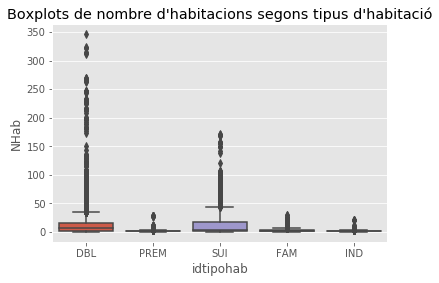

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

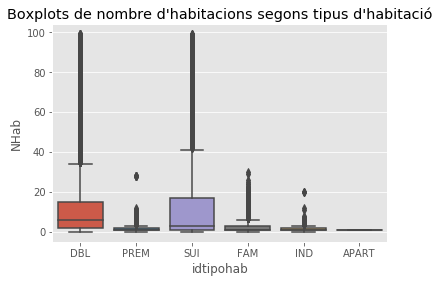

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

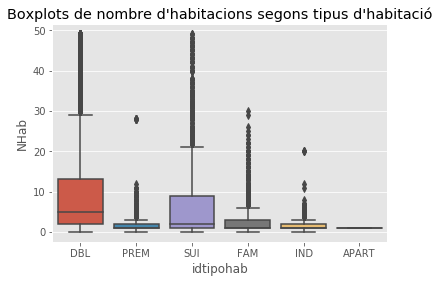

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

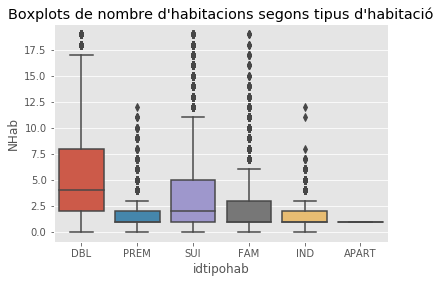

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

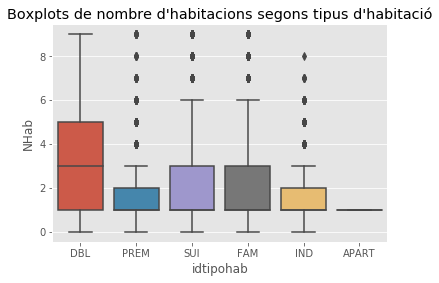

In [44]:
plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df1))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df10))

In [45]:
habitacionsPerCategoria(df1['idtipohab'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DBL,371555,79.799
2,SUI,60564,13.007
3,FAM,25556,5.489
1,PREM,5140,1.104
4,IND,2800,0.601


##### Comportament de idtipohab amb idhotel

S'analitza el tipus d'habitació que ven cada hotel

In [46]:
hotelHab = pd.crosstab(df1.idhotel, df1.idtipohab, margins = True, margins_name = 'Total')
hotelHab


idtipohab,DBL,FAM,IND,PREM,SUI,Total
idhotel,,,,,,
AV_SUITES,0,0,0,0,1467,1467
BAHIA_TOSSA,6852,1155,480,1613,1355,11455
COSTA_SALOU,505,0,0,0,0,505
DONAIRE_BEACH,5413,3148,37,147,0,8745
MAR_MENUDA,1735,157,0,0,0,1892
PORT_SALOU,6770,3069,372,991,16,11218
TAURUS_AQUAPARK,7172,3494,816,0,866,12348
Total,28447,11023,1705,2751,3704,47630


In [47]:
print("L'hotel", hotelHab[4:5].index.tolist(), "i el", hotelHab[2:3].index.tolist(), "gairebé només venen habitacions dobles, mentre que el", hotelHab[0:1].index.tolist(), "només ven Suits")

L'hotel ['MAR_MENUDA'] i el ['COSTA_SALOU'] gairebé només venen habitacions dobles, mentre que el ['AV_SUITES'] només ven Suits


### Règim

#### Anàlisi univariat

In [48]:
df1.idregimen.describe()

count     47630
unique        5
top          MP
freq      17334
Name: idregimen, dtype: object

Text(0.5, 1.0, 'Règim')

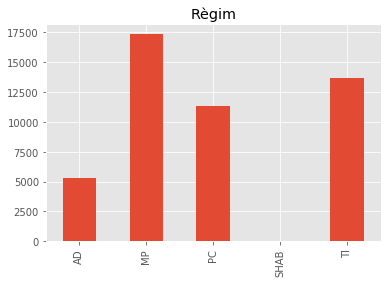

Text(0.5, 1.0, 'Règim')

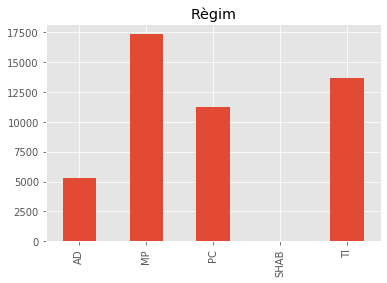

Text(0.5, 1.0, 'Règim')

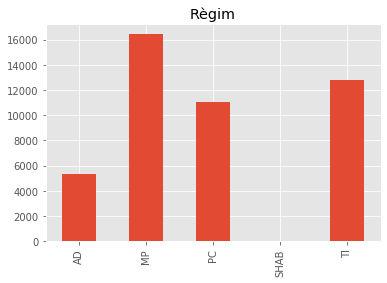

Text(0.5, 1.0, 'Règim')

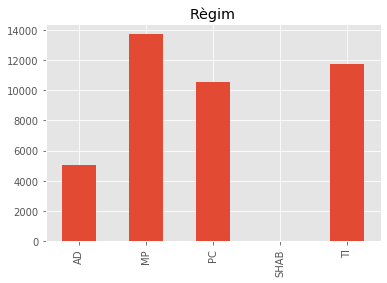

Text(0.5, 1.0, 'Règim')

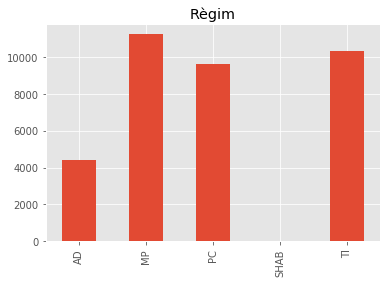

In [33]:
plt.title('Règim')
plt.show(df1['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df100['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df50['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df20['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df10['idregimen'].value_counts().sort_index().plot.bar())



In [32]:
r = pd.concat([df1['idregimen'].value_counts().sort_index()/len(df1)*100, 
                df1['idregimen'].value_counts().sort_index()], axis = 1)
r.columns = ['%', 'Recompte']
r.sort_values(by=['Recompte'], ascending = False)

r100 = pd.concat([df100['idregimen'].value_counts().sort_index()/len(df100)*100, 
                df100['idregimen'].value_counts().sort_index()], axis = 1)
r100.columns = ['%', 'Recompte']
r100.sort_values(by=['Recompte'], ascending = False)

r50 = pd.concat([df50['idregimen'].value_counts().sort_index()/len(df50)*100, 
                df50['idregimen'].value_counts().sort_index()], axis = 1)
r50.columns = ['%', 'Recompte']
r50.sort_values(by=['Recompte'], ascending = False)

r20 = pd.concat([df20['idregimen'].value_counts().sort_index()/len(df20)*100, 
                df20['idregimen'].value_counts().sort_index()], axis = 1)
r20.columns = ['%', 'Recompte']
r20.sort_values(by=['Recompte'], ascending = False)

r10 = pd.concat([df10['idregimen'].value_counts().sort_index()/len(df10)*100, 
                df10['idregimen'].value_counts().sort_index()], axis = 1)
r10.columns = ['%', 'Recompte']
r10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
MP,36.393030,17334
TI,28.662608,13652
PC,23.772832,11323
AD,11.150535,5311
SHAB,0.020995,10


,%,Recompte
MP,36.471232,17318
TI,28.723359,13639
PC,23.599528,11206
AD,11.184820,5311
SHAB,0.021060,10


,%,Recompte
MP,36.018864,16421
TI,28.030270,12779
PC,24.292608,11075
AD,11.636324,5305
SHAB,0.021935,10


,%,Recompte
MP,33.423601,13700
TI,28.622313,11732
PC,25.687380,10529
AD,12.242309,5018
SHAB,0.024397,10


,%,Recompte
MP,31.532974,11227
TI,29.013594,10330
PC,26.971689,9603
AD,12.453657,4434
SHAB,0.028087,10


El règim més observat és el de mitja pensió, mentre que només s'hi veuen 10 casos on es demani només habitació.

#### Anàlisi bivariat 

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

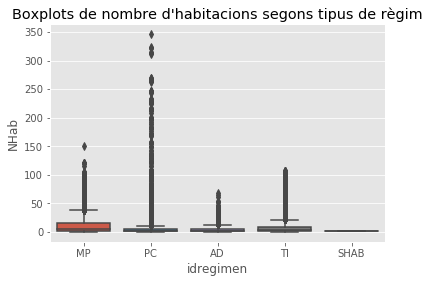

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

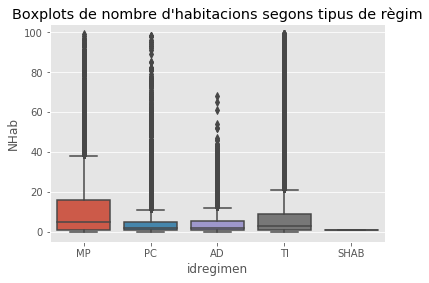

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

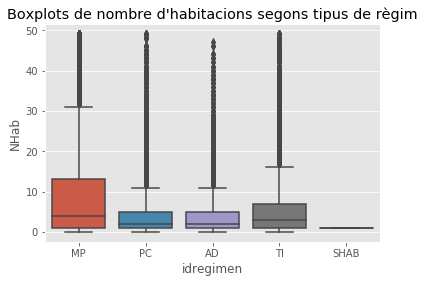

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

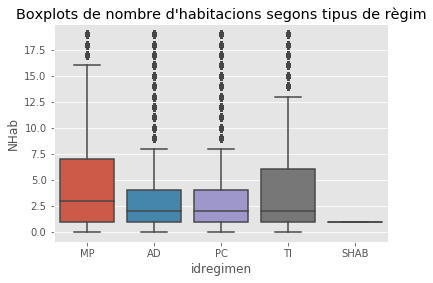

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

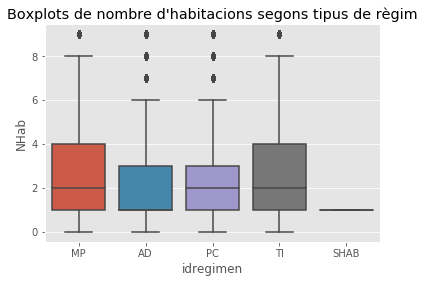

In [51]:
plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df1))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df10))

In [52]:
habitacionsPerCategoria(df1['idregimen'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,MP,211617,45.449
3,TI,145416,31.231
1,PC,82545,17.728
2,AD,26027,5.590
4,SHAB,10,0.002


### Segment

#### Anàlisi univariat

In [53]:
df1.idsegmento.describe()

count           47630
unique              2
top       DESCONOCIDO
freq            37969
Name: idsegmento, dtype: object

Text(0.5, 1.0, 'Segment')

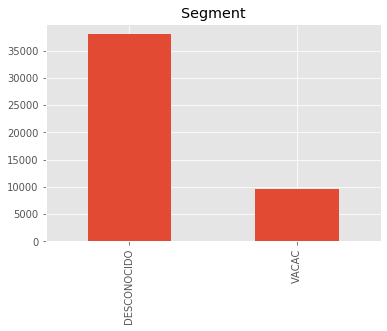

Text(0.5, 1.0, 'Segment')

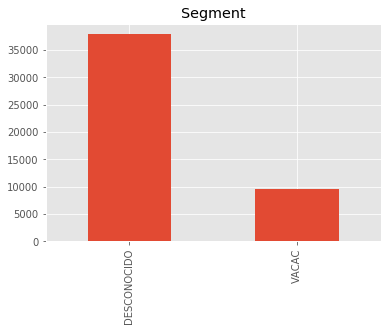

Text(0.5, 1.0, 'Segment')

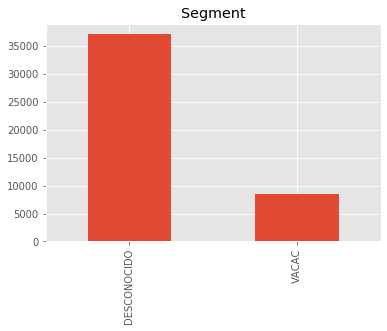

Text(0.5, 1.0, 'Segment')

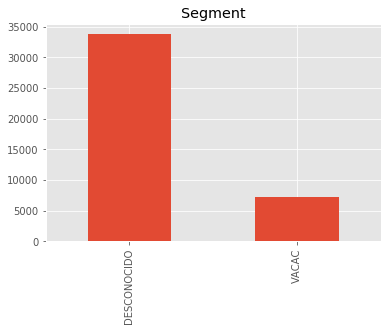

Text(0.5, 1.0, 'Segment')

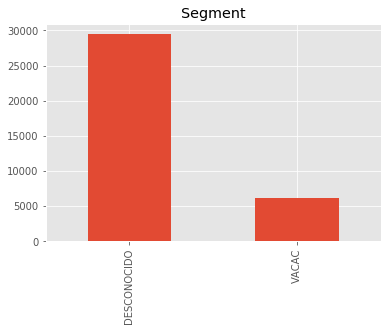

In [34]:
plt.title("Segment")
plt.show(df1['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df100['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df50['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df20['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df10['idsegmento'].value_counts().sort_index().plot.bar())




In [35]:
s = pd.concat([df1['idsegmento'].value_counts().sort_index()/len(df1)*100, 
                df1['idsegmento'].value_counts().sort_index()], axis = 1)
s.columns = ['%', 'Recompte']
s.sort_values(by=['Recompte'], ascending = False)

s100 = pd.concat([df100['idsegmento'].value_counts().sort_index()/len(df100)*100, 
                df100['idsegmento'].value_counts().sort_index()], axis = 1)
s100.columns = ['%', 'Recompte']
s100.sort_values(by=['Recompte'], ascending = False)

s50 = pd.concat([df50['idsegmento'].value_counts().sort_index()/len(df50)*100, 
                df50['idsegmento'].value_counts().sort_index()], axis = 1)
s50.columns = ['%', 'Recompte']
s50.sort_values(by=['Recompte'], ascending = False)

s20 = pd.concat([df20['idsegmento'].value_counts().sort_index()/len(df20)*100, 
                df20['idsegmento'].value_counts().sort_index()], axis = 1)
s20.columns = ['%', 'Recompte']
s20.sort_values(by=['Recompte'], ascending = False)

s10 = pd.concat([df10['idsegmento'].value_counts().sort_index()/len(df10)*100, 
                df10['idsegmento'].value_counts().sort_index()], axis = 1)
s10.columns = ['%', 'Recompte']
s10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,79.716565,37969
VACAC,20.283435,9661


,%,Recompte
DESCONOCIDO,79.734226,37861
VACAC,20.265774,9623


,%,Recompte
DESCONOCIDO,81.414784,37117
VACAC,18.585216,8473


,%,Recompte
DESCONOCIDO,82.344044,33752
VACAC,17.655956,7237


,%,Recompte
DESCONOCIDO,82.690147,29441
VACAC,17.309853,6163


La gran majoria d’observacions tenen un segment desconegut, i només un 12% són provinent d’un segment vocacional. Sembla estrany que hi hagin tant poques observacions provinents d’assumptes vocacionals quan, precisament, aquests tipus d’hotels estan especialment fets per a estades vacacionals. Això podria ser degut a una mala recollida de dades i ja es veurà quina decisió es pren amb aquesta variable a l’hora de definir les variables predictores finals per al model.

#### Anàlisi bivariat

In [56]:
habitacionsPerCategoria(df1['idsegmento'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DESCONOCIDO,307975,66.144
1,VACAC,157640,33.856


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

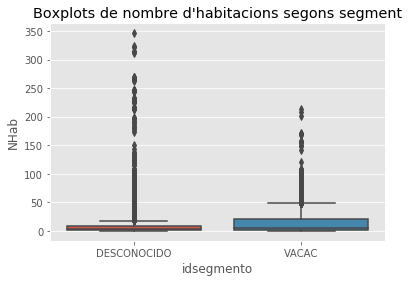

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

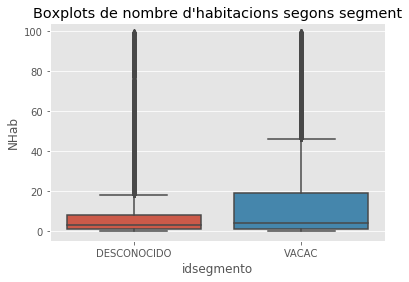

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

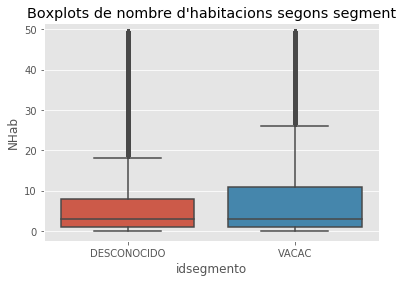

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

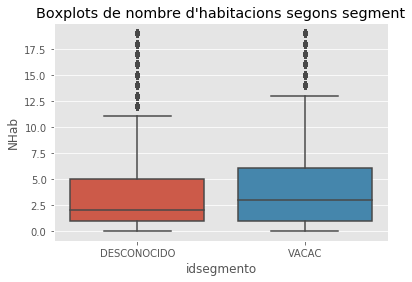

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

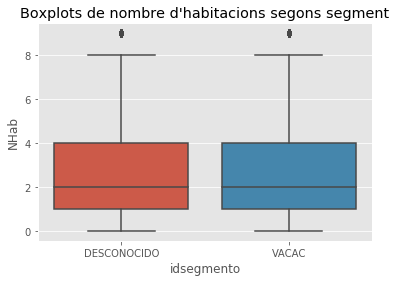

In [57]:
plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df1))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df10))

### Canal

#### Anàlisi univariat

In [58]:
df1.id_canal.describe()

count           47630
unique              5
top       DESCONOCIDO
freq            42848
Name: id_canal, dtype: object

Text(0.5, 1.0, 'Canal')

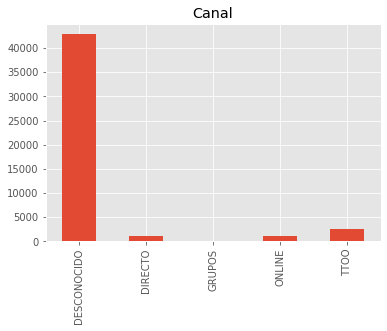

Text(0.5, 1.0, 'Canal')

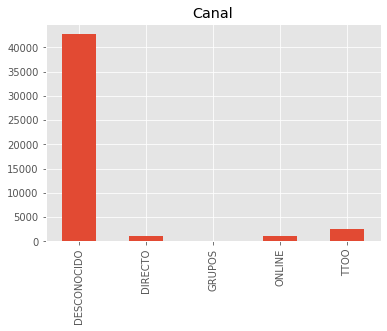

Text(0.5, 1.0, 'Canal')

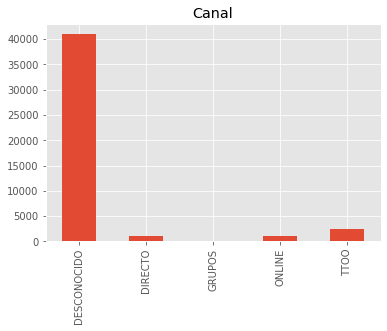

Text(0.5, 1.0, 'Canal')

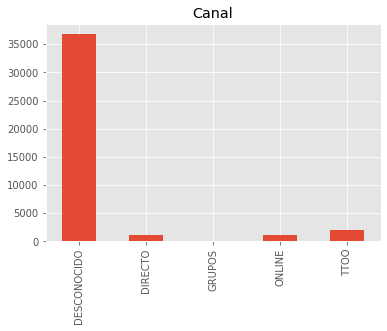

Text(0.5, 1.0, 'Canal')

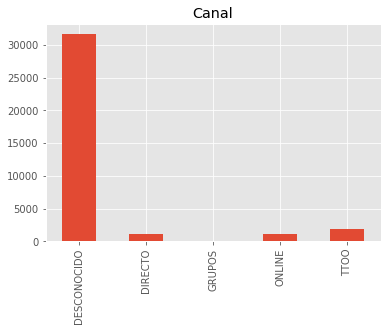

In [36]:
plt.title("Canal")
plt.show(df1['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df100['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df50['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df20['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df10['id_canal'].value_counts().sort_index().plot.bar())



In [37]:
c = pd.concat([df1['id_canal'].value_counts().sort_index()/len(df1)*100, 
               df1['id_canal'].value_counts().sort_index()], axis = 1)
c.columns = ['%', 'Recompte']
c.sort_values(by=['Recompte'], ascending = False)

c100 = pd.concat([df100['id_canal'].value_counts().sort_index()/len(df100)*100, 
               df100['id_canal'].value_counts().sort_index()], axis = 1)
c100.columns = ['%', 'Recompte']
c100.sort_values(by=['Recompte'], ascending = False)

c50 = pd.concat([df50['id_canal'].value_counts().sort_index()/len(df50)*100, 
               df50['id_canal'].value_counts().sort_index()], axis = 1)
c50.columns = ['%', 'Recompte']
c50.sort_values(by=['Recompte'], ascending = False)

c20 = pd.concat([df20['id_canal'].value_counts().sort_index()/len(df20)*100, 
               df20['id_canal'].value_counts().sort_index()], axis = 1)
c20.columns = ['%', 'Recompte']
c20.sort_values(by=['Recompte'], ascending = False)

c10 = pd.concat([df10['id_canal'].value_counts().sort_index()/len(df10)*100, 
               df10['id_canal'].value_counts().sort_index()], axis = 1)
c10.columns = ['%', 'Recompte']
c10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,89.960109,42848
TTOO,5.313878,2531
ONLINE,2.395549,1141
DIRECTO,2.259080,1076
GRUPOS,0.071384,34


,%,Recompte
DESCONOCIDO,89.929239,42702
TTOO,5.330216,2531
ONLINE,2.402915,1141
DIRECTO,2.266026,1076
GRUPOS,0.071603,34


,%,Recompte
DESCONOCIDO,89.833297,40955
TTOO,5.240184,2389
ONLINE,2.502742,1141
DIRECTO,2.360167,1076
GRUPOS,0.063610,29


,%,Recompte
DESCONOCIDO,89.670399,36755
TTOO,4.906194,2011
ONLINE,2.783674,1141
DIRECTO,2.625095,1076
GRUPOS,0.014638,6


,%,Recompte
DESCONOCIDO,88.773733,31607
TTOO,5.137063,1829
ONLINE,3.075497,1095
DIRECTO,3.002472,1069
GRUPOS,0.011235,4


El cas d’aquesta variable és semblant al de la variable idsegmento, sembla que les dades no s’han recollit correctament, ja que gairebé un 90% de les observacions és de caràcter desconegut. 


#### Anàlisi bivariat

In [61]:
habitacionsPerCategoria(df1['id_canal'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,DESCONOCIDO,430382,92.433
3,TTOO,28978,6.224
2,ONLINE,3011,0.647
1,DIRECTO,2298,0.494
4,GRUPOS,946,0.203


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

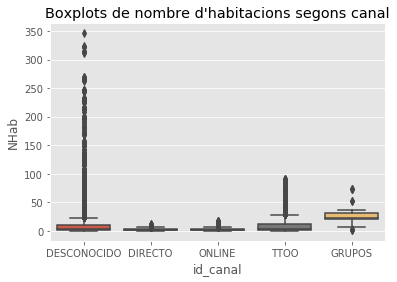

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

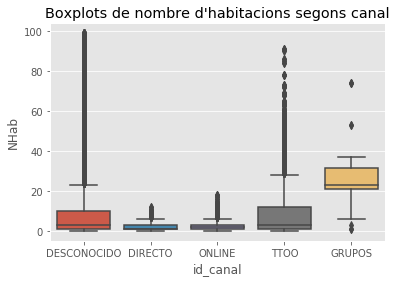

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

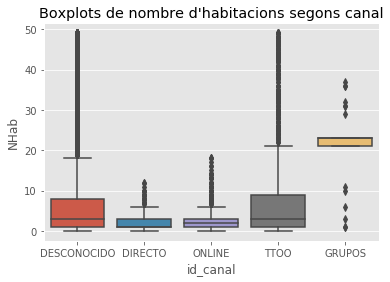

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

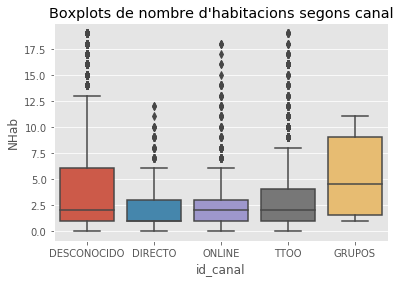

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

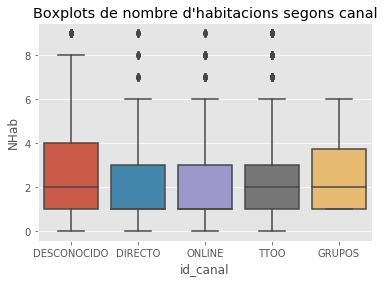

In [62]:
plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df1))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df10))

El comportament d’aquesta variable respecte a la objectiu és semblant per a tots els nivells excepte per als GRUPOS, on més del 75% de les dades d’aquest nivell corresponen a valors força alts de NHab.

### País client

#### Anàlisi univariat

In [63]:
df1.idpais_cliente.describe()

count     47630
unique        8
top          ES
freq      24888
Name: idpais_cliente, dtype: object

Text(0.5, 1.0, "País de l'agència client")

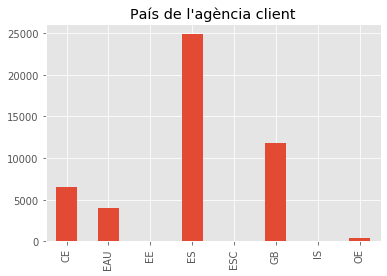

Text(0.5, 1.0, "País de l'agència client")

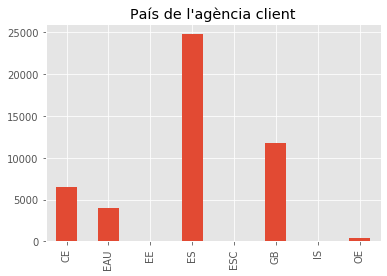

Text(0.5, 1.0, "País de l'agència client")

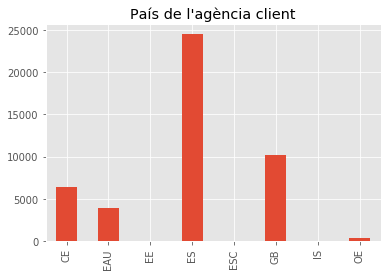

Text(0.5, 1.0, "País de l'agència client")

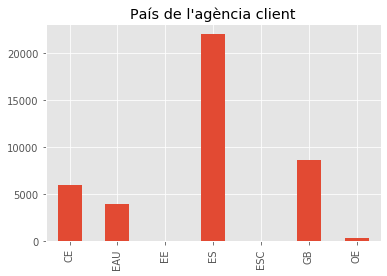

Text(0.5, 1.0, "País de l'agència client")

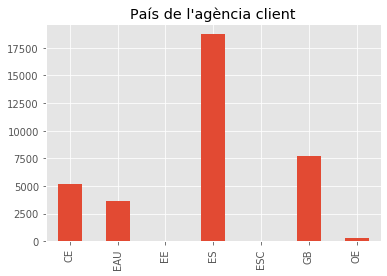

In [38]:
plt.title("País de l'agència client")
plt.show(df1['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df100['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df50['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df20['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df10['idpais_cliente'].value_counts().sort_index().plot.bar())



In [39]:
pc = pd.concat([df1['idpais_cliente'].value_counts().sort_index()/len(df1)*100, 
           df1['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc.columns = ['%', 'Recompte']
pc.sort_values(by = 'Recompte', ascending = False)

pc100 = pd.concat([df100['idpais_cliente'].value_counts().sort_index()/len(df100)*100, 
                df100['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc100.columns = ['%', 'Recompte']
pc100.sort_values(by=['Recompte'], ascending = False)

pc50 = pd.concat([df50['idpais_cliente'].value_counts().sort_index()/len(df50)*100, 
                df50['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc50.columns = ['%', 'Recompte']
pc50.sort_values(by=['Recompte'], ascending = False)

pc20 = pd.concat([df20['idpais_cliente'].value_counts().sort_index()/len(df20)*100, 
                df20['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc20.columns = ['%', 'Recompte']
pc20.sort_values(by=['Recompte'], ascending = False)

pc10 = pd.concat([df10['idpais_cliente'].value_counts().sort_index()/len(df10)*100, 
                df10['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc10.columns = ['%', 'Recompte']
pc10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
ES,52.252782,24888
GB,24.778501,11802
CE,13.655259,6504
EAU,8.337182,3971
OE,0.772622,368
EE,0.134369,64
ESC,0.048289,23
IS,0.020995,10


,%,Recompte
ES,52.202847,24788
GB,24.797827,11775
CE,13.686716,6499
EAU,8.362817,3971
OE,0.745514,354
EE,0.134782,64
ESC,0.048437,23
IS,0.021060,10


,%,Recompte
ES,53.663084,24465
GB,22.491775,10254
CE,14.145646,6449
EAU,8.710243,3971
OE,0.776486,354
EE,0.140382,64
ESC,0.050450,23
IS,0.021935,10


,%,Recompte
ES,53.636341,21985
GB,21.134939,8663
CE,14.606358,5987
EAU,9.624533,3945
OE,0.841689,345
EE,0.143941,59
ESC,0.012198,5


,%,Recompte
ES,52.578362,18720
GB,21.618357,7697
CE,14.464667,5150
EAU,10.274127,3658
OE,0.884732,315
EE,0.165712,59
ESC,0.014043,5


#### Anàlisi bivariat

In [66]:
habitacionsPerCategoria(df1['idpais_cliente'], df1).sort_values(by=['Percentatge %'], ascending = False)

,id,Total habitacions,Percentatge %
0,ES,206434,44.336
3,GB,196131,42.123
1,CE,44698,9.600
2,EAU,13572,2.915
4,OE,3826,0.822
5,ESC,498,0.107
7,IS,260,0.056
6,EE,196,0.042


Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

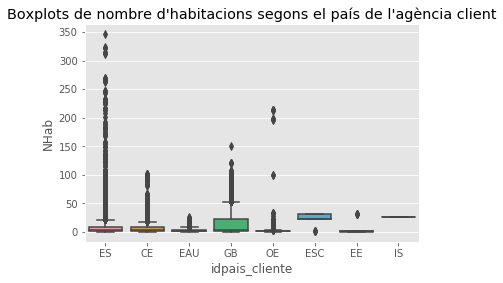

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

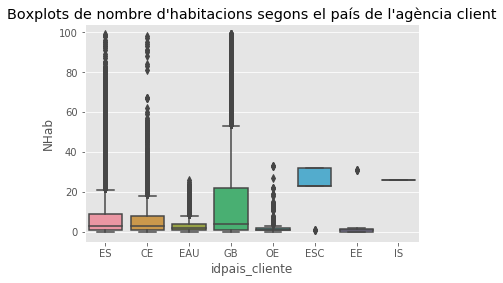

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

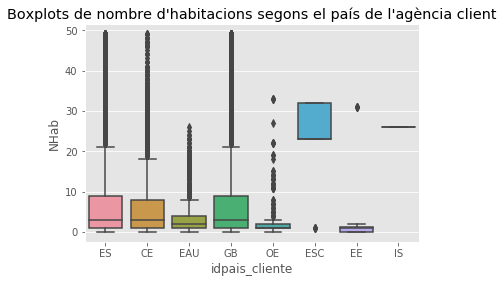

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

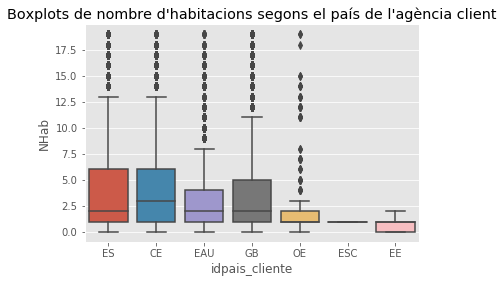

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

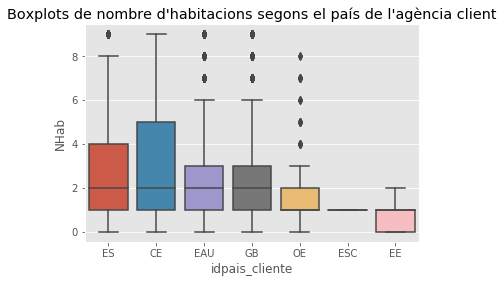

In [67]:
plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df1))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df10))

En més de la meitat de les observacions, el país d’origen de l’agència client és Espanya. Té certa lògica ja que els hotels es troben a Catalunya. 
Es veuen comportaments diferents segons els països d’origen. Destaquen els casos de Gran Bretanya, Escandinàvia i Islandia.


### Data

#### Anàlisi univariat

In [68]:
df1.diaAño.describe()

count     47630
unique      261
top         187
freq        415
Name: diaAño, dtype: int64

Text(0.5, 1.0, "Distribució dels dies de l'any")

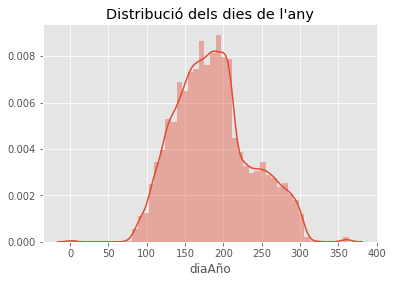

In [69]:
plt.title("Distribució dels dies de l'any")
sns.distplot(df1.diaAño)

In [70]:
d = pd.concat([df1['diaAño'].value_counts().sort_index()/len(df1)*100, 
           df1['diaAño'].value_counts().sort_index()], axis = 1)
d.columns = ['%', 'Recompte']
d

,%,Recompte
1,0.044090,21
2,0.018896,9
75,0.002100,1
76,0.006299,3
77,0.006299,3
...,...,...
360,0.018896,9
361,0.018896,9
362,0.018896,9
363,0.018896,9


#### Anàlisi bivariat

Text(0.5, 1.0, "Nombre d'habitacions segons el dia de l'any")

Text(0.5, 0, "Dia de l'any")

Text(0, 0.5, 'Nº habitacions reservades')

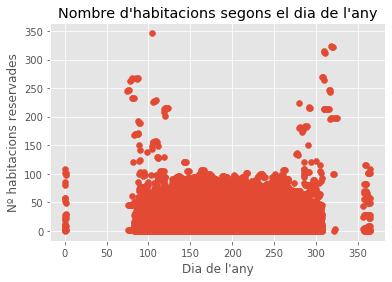

In [71]:
plt.title("Nombre d'habitacions segons el dia de l'any")
plt.xlabel("Dia de l'any")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['diaAño'],df1['NHab'])

## Variables numèriques

### Preu mig

#### Anàlisi univariat

In [40]:
df1.describe()

,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,9.775667,9.622864,9.531031,9.415410,9.175331,8.914886,8.677724,8.442326,8.204976,7.979656,7.777745,7.591644,7.422108,7.292463,7.171426,7.015578,6.866660,6.709616,6.518098,6.334180,6.149633,5.935335,5.722066,5.540794,5.365421,5.187382,5.001638,4.843859,4.676716,4.506571,4.322402,4.200189,4.076422,3.940101,3.808041,3.679467,3.536679,3.408104,3.278837,3.164539,3.041256,2.937980,2.826013,2.717363,2.600525,2.483015,2.367290,2.231787,2.085828,1.936637,1.752908,1.550535,1.324522,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,18.072125,17.967986,17.413474,17.129856,17.081146,17.080149,17.175535,17.248968,17.226890,17.140615,17.108430,17.113698,17.171504,17.306408,17.494873,17.496612,17.471529,17.452350,17.406240,17.331514,17.157436,16.890408,16.578920,16.383344,16.152014,15.979200,15.700599,15.507883,15.266284,14.975708,14.610915,14.432466,14.289004,14.070137,13.777481,13.537180,13.184822,12.828262,12.445226,12.142252,11.793388,11.504943,11.187738,10.879682,10.543458,10.192654,9.791587,9.289027,8.691982,8.105719,7.427681,6.696003,5.862117,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,0.000000,0.000000,0.000000

In [72]:
df1['PreuHab'].describe()

count    47630.000000
mean       131.448197
std         72.537042
min         40.000000
25%         79.038319
50%        113.953165
75%        165.453409
max        713.005287
Name: PreuHab, dtype: float64

Text(0.5, 1.0, 'Boxplot del preu mig')

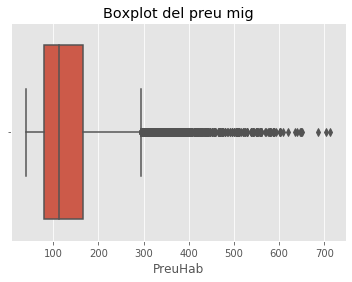

Text(0.5, 1.0, 'Boxplot del preu mig')

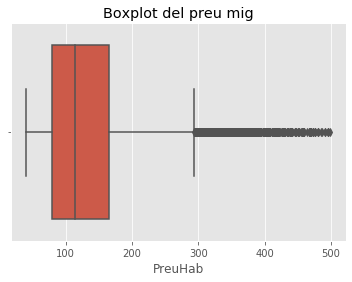

In [73]:
plt.title("Boxplot del preu mig")
plt.show(sns.boxplot(df1['PreuHab']))

plt.title("Boxplot del preu mig")
plt.show(sns.boxplot(df1[df1['PreuHab'] < 500]['PreuHab']))

Text(0.5, 1.0, 'Preu mig habitació')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Recompte')

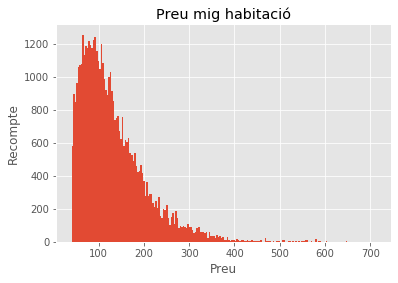

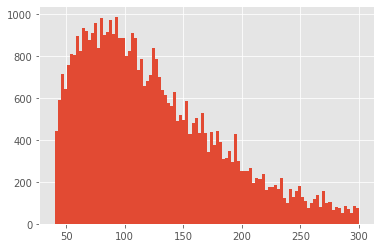

In [74]:
plt.title("Preu mig habitació")
plt.xlabel('Preu')
plt.ylabel('Recompte')
plt.show(plt.hist(df1['PreuHab'], bins = 200))
plt.show(plt.hist(df1[df1['PreuHab'] <300]['PreuHab'], bins = 100))

In [42]:
pPhab = []
## Càlcul percentatge representatiu de la mostra segons NHab
for i in range(1700):
    pPhab.append(round((df1[df1['PreuHab']>=i].shape[0]/df1.shape[0])*100, 2))

Text(0.5, 1.0, 'Percentil segons el preu de la reserva')

Text(0.5, 0, 'Preu de la reserva')

Text(0, 0.5, 'Percentil')

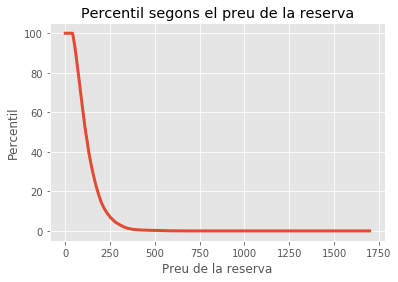

In [43]:
plt.title("Percentil segons el preu de la reserva")
plt.xlabel("Preu de la reserva")
plt.ylabel("Percentil")
plt.plot(range(1700), pPhab, linewidth = 3)

In [44]:
menorPreu5 = filter(filtroMenorQue5, pPhab)
pPhab5 = []

for i in menorPreu5:
    pPhab5.append(i)

Text(0.5, 1.0, 'Percentil segons el preu de la reserva')

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Percentil')

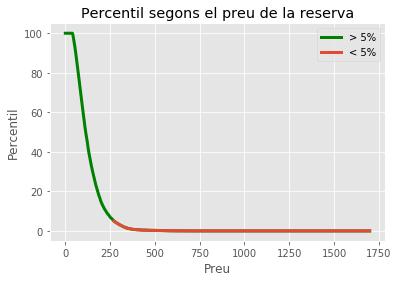

In [45]:
plt.title("Percentil segons el preu de la reserva")
plt.xlabel("Preu")
plt.ylabel("Percentil")
plt.plot(range(1700), pPhab, c = 'g', linewidth = 3, label = '> 5%')
plt.plot(range(len(pPhab) - len(pPhab5), 1700), pPhab5[0:(1700-(len(pPhab) - len(pPhab5)))], linewidth = 3, label = '< 5%')
plt.legend()

In [46]:
print("Si només s'agafen dades a partir de", len(pPhab) - len(pPhab5), "euros, les dades que s'agafin representaran menys d'un 5% del conjunt de dades original.")

Si només s'agafen dades a partir de 272 euros, les dades que s'agafin representaran menys d'un 5% del conjunt de dades original.


In [80]:
df1.describe()

,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52
count,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000,47630.000000
mean,9.775667,9.622864,9.531031,9.415410,9.175331,8.914886,8.677724,8.442326,8.204976,7.979656,7.777745,7.591644,7.422108,7.292463,7.171426,7.015578,6.866660,6.709616,6.518098,6.334180,6.149633,5.935335,5.722066,5.540794,5.365421,5.187382,5.001638,4.843859,4.676716,4.506571,4.322402,4.200189,4.076422,3.940101,3.808041,3.679467,3.536679,3.408104,3.278837,3.164539,3.041256,2.937980,2.826013,2.717363,2.600525,2.483015,2.367290,2.231787,2.085828,1.936637,1.752908,1.550535,1.324522,131.448197,131.404295,131.353334,131.457491,131.515058,131.558413,131.699337,131.800236,131.887223,131.890701,131.809109,131.816538,131.763683,131.817357,131.832852,131.792227,131.783384,131.833032,131.857602,131.917310,131.960818,131.978260,131.977338,131.878116,131.812304,131.748835,131.721124,131.682305,131.722233,131.769581,131.767964,131.737525,131.673330,131.634962,131.638935,131.655632,131.705414,131.715931,131.679004,131.645377,131.606033,131.565061,131.552670,131.551118,131.554712,131.552175,131.523347,131.491040,131.459343,131.448712,131.472721,131.478685,131.477563
std,18.072125,17.967986,17.413474,17.129856,17.081146,17.080149,17.175535,17.248968,17.226890,17.140615,17.108430,17.113698,17.171504,17.306408,17.494873,17.496612,17.471529,17.452350,17.406240,17.331514,17.157436,16.890408,16.578920,16.383344,16.152014,15.979200,15.700599,15.507883,15.266284,14.975708,14.610915,14.432466,14.289004,14.070137,13.777481,13.537180,13.184822,12.828262,12.445226,12.142252,11.793388,11.504943,11.187738,10.879682,10.543458,10.192654,9.791587,9.289027,8.691982,8.105719,7.427681,6.696003,5.862117,72.537042,72.413405,72.045001,71.927486,71.775605,71.823800,71.852545,72.014377,72.284747,72.370823,72.372299,72.409366,72.357744,72.313310,72.179555,72.023012,71.984373,72.089728,72.179050,72.479470,72.680512,72.748956,72.838484,72.792033,72.761923,72.769256,72.823501,72.702226,72.958080,73.128694,73.003434,73.017446,72.922247,72.896744,72.867924,72.856838,72.823597,72.808201,72.775667,72.755926,72.733829,72.720886,72.718243,72.749320,72.750756,72.756389,72.753207,72.722315,72.737019,72.734417,72.741542,72.747899,72.738179
min,0.000000,0.000000,0.000000

El preu mig d’una habitació és de 136 euros, mentre que els mínims i màxims coincideixen amb el punt de tall establert en el preprocessament. 
Hi ha una gran distància entre el preu del percentil 75 i el màxim, la majoria de preus ronden entre els 80 i els 175 euros aproximadament. Més enllà dels 300 euros són preus poc freqüents com es veu en el diagrama de caixa.


#### Anàlisi bivariat

Text(0.5, 1.0, "Nombre d'habitacions segons el preu")

Text(0.5, 0, 'Preu')

Text(0, 0.5, 'Nº habitacions reservades')

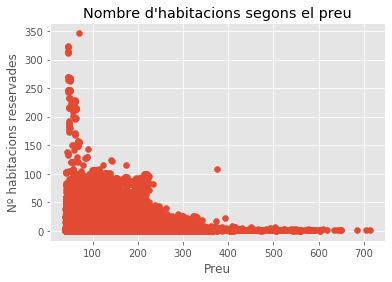

In [81]:
plt.title("Nombre d'habitacions segons el preu")
plt.xlabel("Preu")
plt.ylabel("Nº habitacions reservades")
plt.scatter(df1['PreuHab'], df1['NHab'])

In [82]:
np.corrcoef(df1['PreuHab'], df1['NHab'])[1][0]

-0.1504576317509891

In [83]:
print("La correlació entre les dues variables és", round(np.corrcoef(df1['PreuHab'], df1['NHab'])[1][0], 4))

La correlació entre les dues variables és -0.1505


Lo qual indica que, lleugerament, com més alt és el número d’habitacions, més baix és el preu. Té cert sentit, ja que una reserva gran d’habitacions pot comportar descomptes.

In [31]:
df.idtipohab.unique()

array(['DBL', 'PREM', 'SUI', 'FAM', 'IND'], dtype=object)

In [15]:
dfextNH = df1[df1['NHab']>46]
dfextP = df1[df1['PreuHab']>272]
dfextNH.to_csv(mainpath + 'dfextNH.csv', header = True, index = None)
dfextP.to_csv(mainpath + 'dfextP.csv', header = True, index = None)
dfcsv = df1.to_csv(mainpath + 'dfFE.csv', header = True, index = None)

In [11]:
df1.head()
df1.shape

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
0,MAR_MENUDA,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,90.895386,87
1,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,PC,DESCONOCIDO,DESCONOCIDO,ES,25,25,22,18,19,12,10,7,6,5,5,4,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98.694182,97.966909,100.581405,99.053030,98.455981,98.648485,95.496363,102.407792,119.475758,115.863636,115.863636,120.420454,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,125.324242,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,142.081819,87
2,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,AD,DESCONOCIDO,DESCONOCIDO,ES,5,2,2,2,1,2,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.461817,73.763636,73.763636,73.763636,85.218182,81.218182,85.218182,71.672727,71.672727,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,85.218182,87
3,BAHIA_TOSSA,2018-03-28,Huespedes,DBL,MP,DESCONOCIDO,DESCONOCIDO,ES,18,11,10,8,8,15,13,12,12,11,10,10,10,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.157831,83.974798,80.664096,74.501712,74.501712,76.577249,74.606971,74.203006,74.203006,80.948734,80.558601,80.558601,80.558601,88.827272,88.827272,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,91.381818,87
4,BAHIA_TOSSA,2018-03-28,Huespedes,PREM,PC,DESCONOCIDO,DESCONOCIDO,ES,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.454546,119.45

(47630, 115)